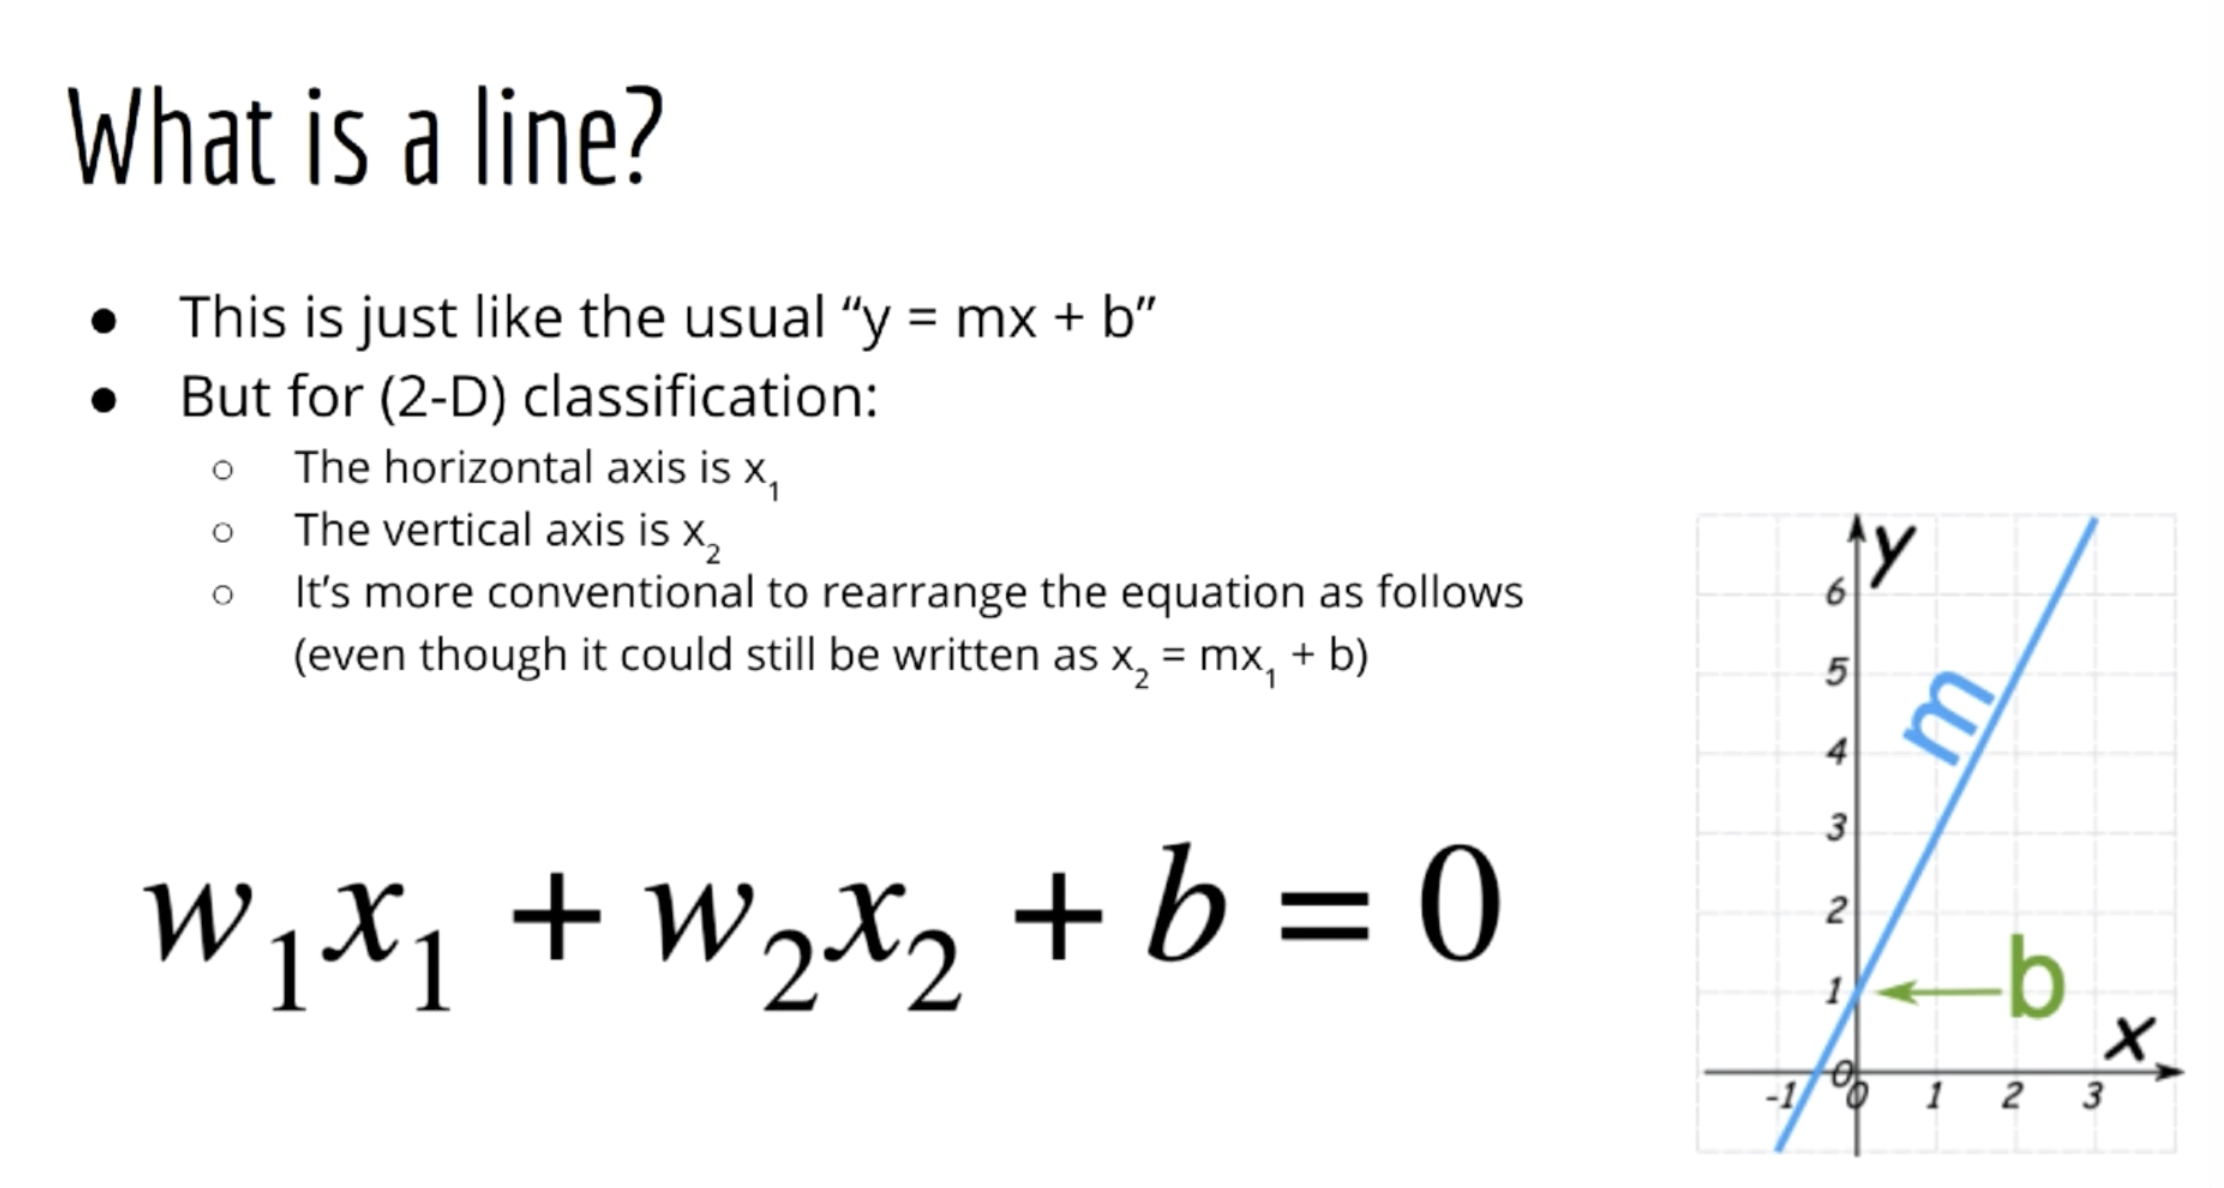

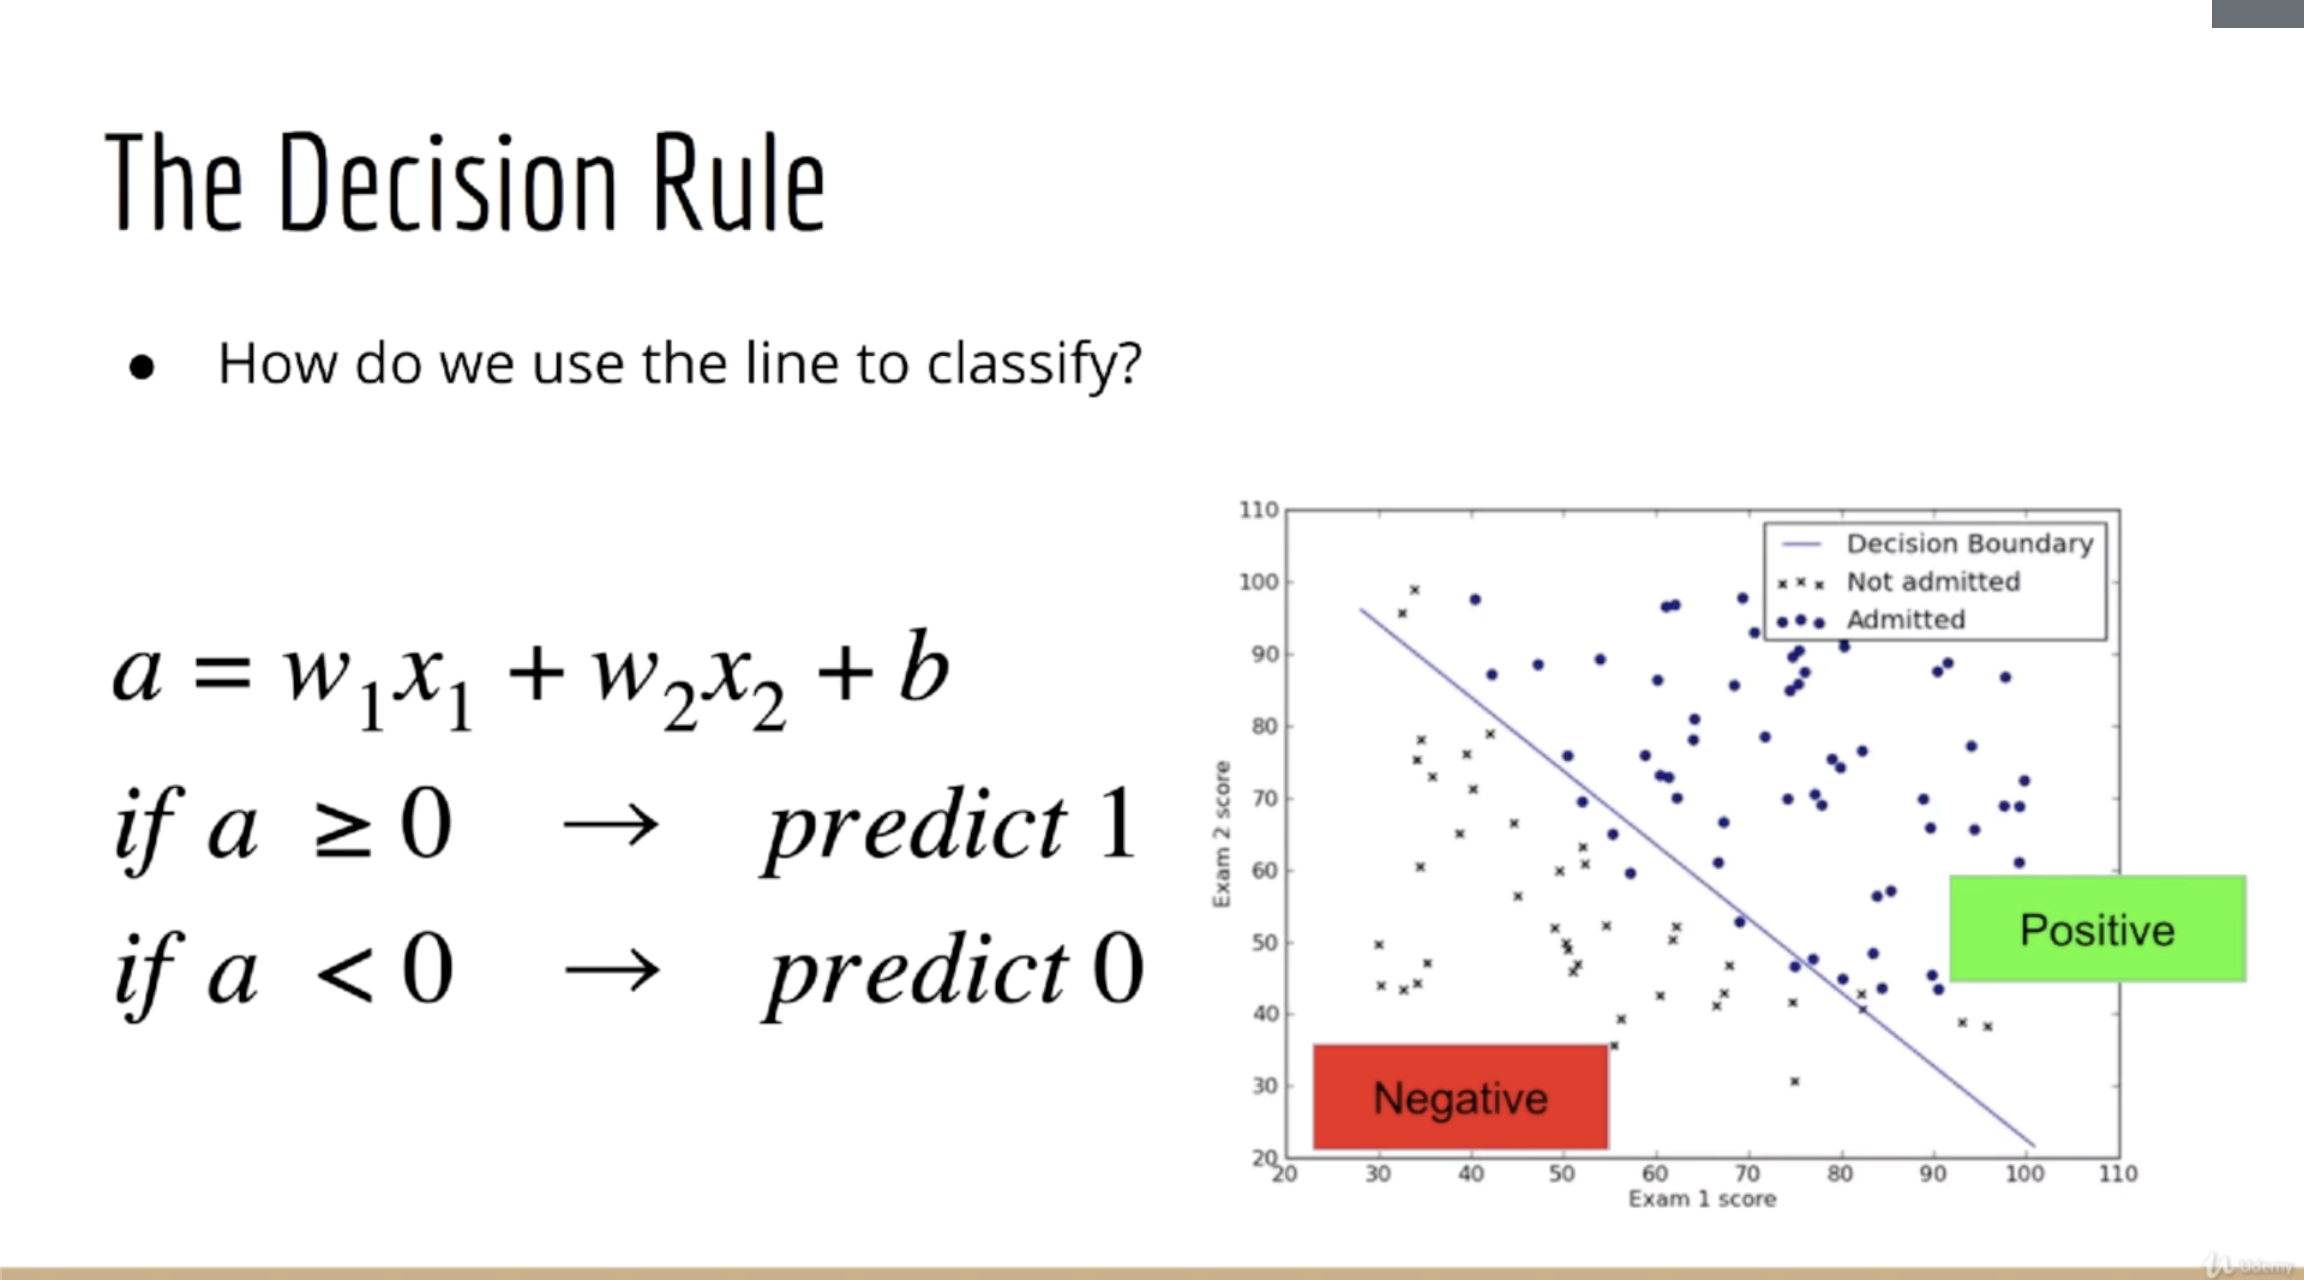

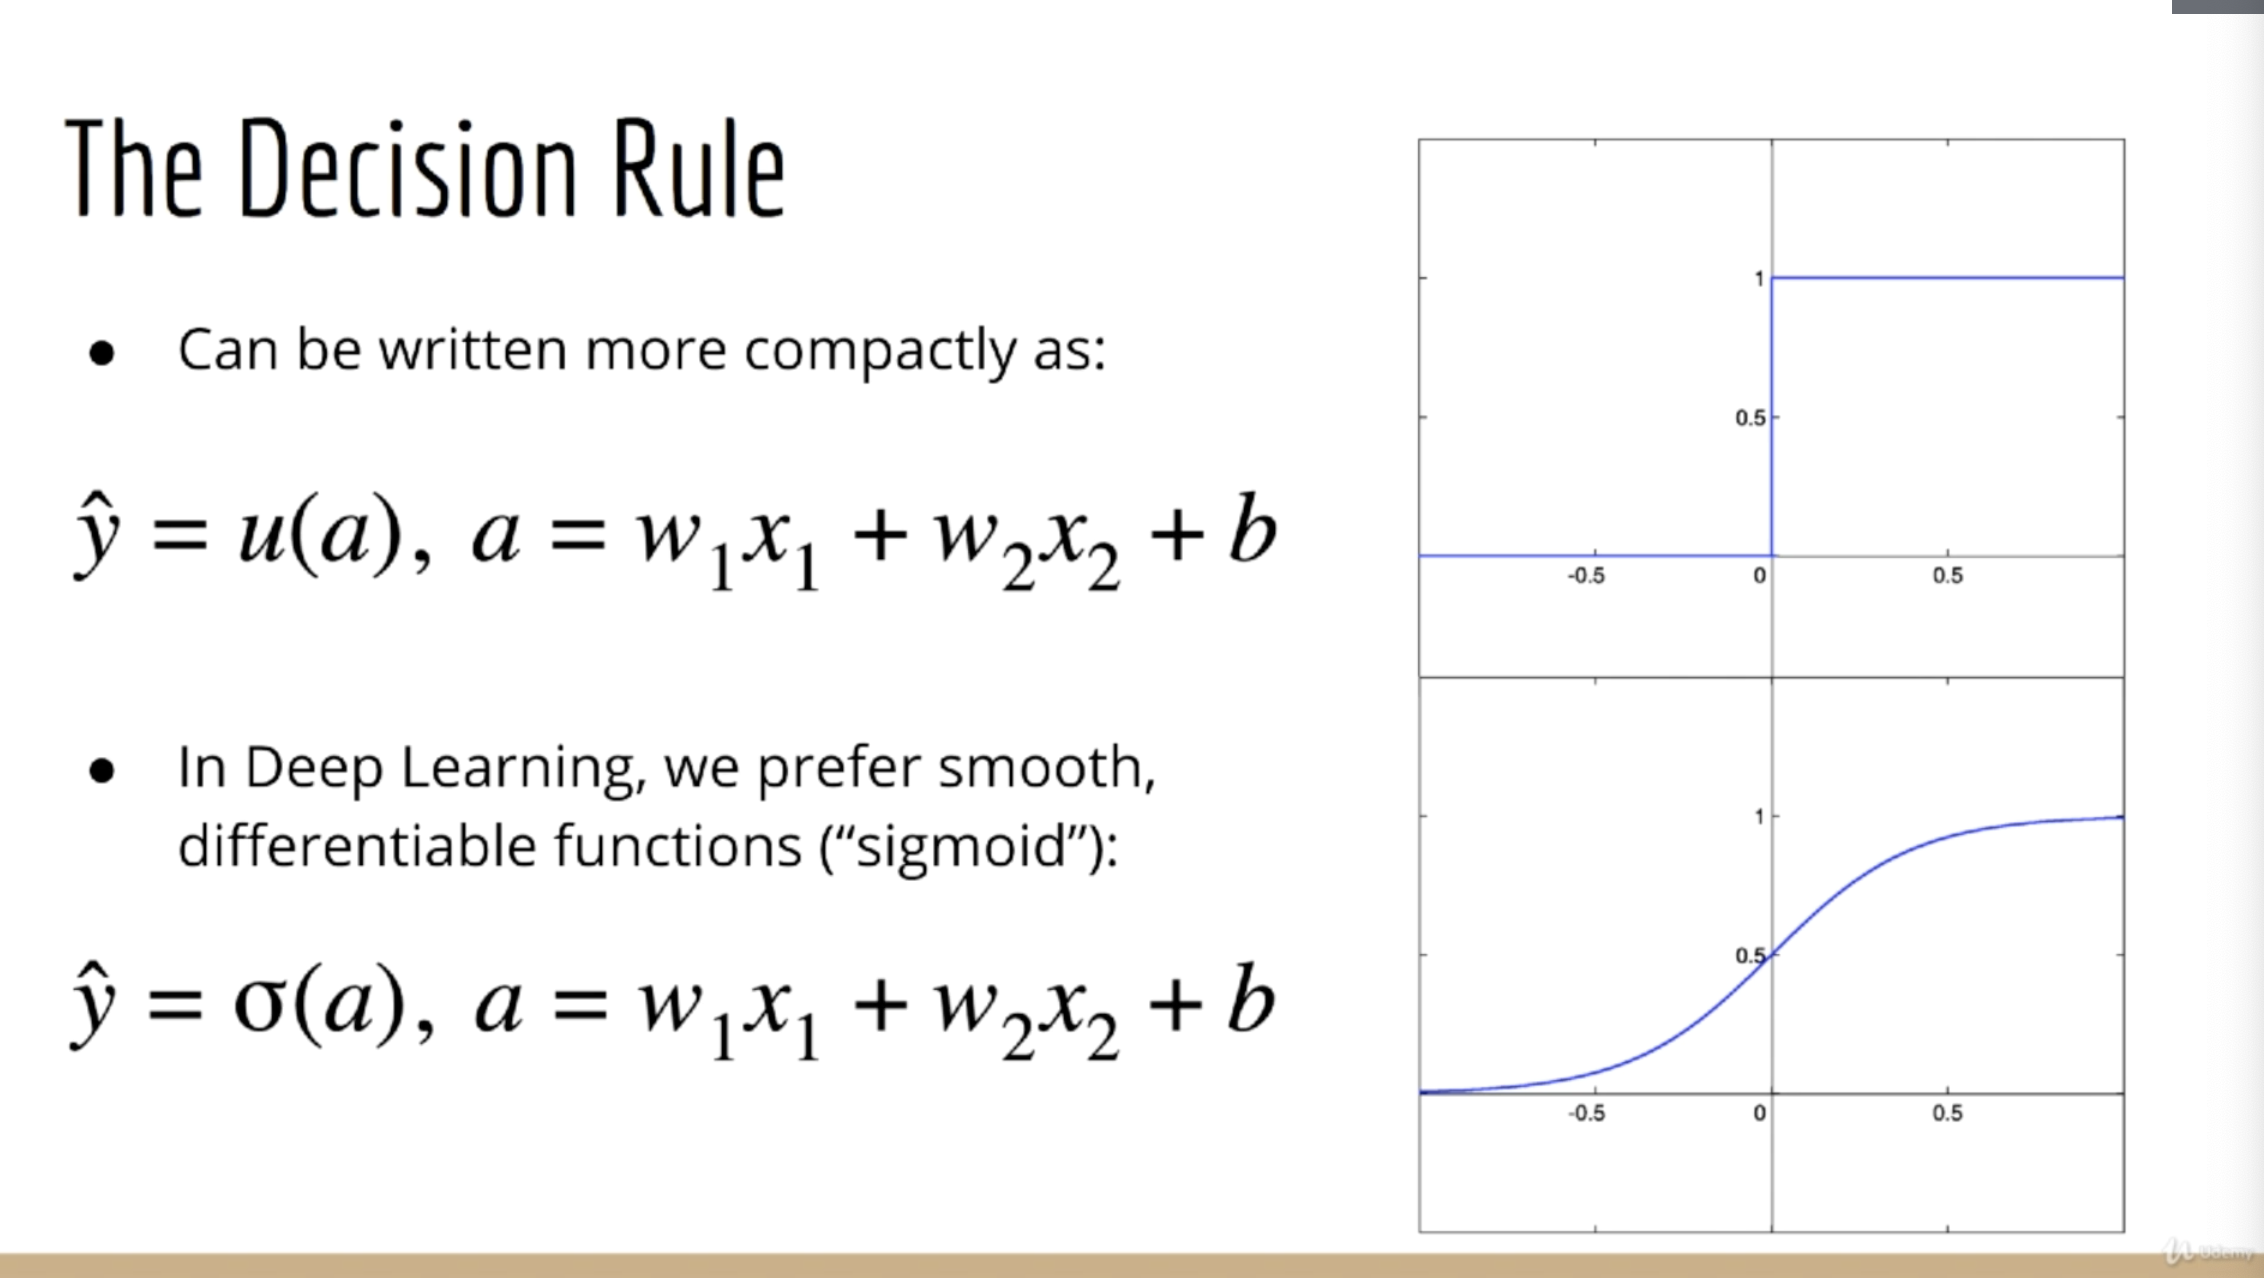

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
print(tf.__version__)

2.4.0


In [ ]:
# !sudo pip3 install scikit-learn

In [2]:
from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.target.shape

(569,)

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
D

30

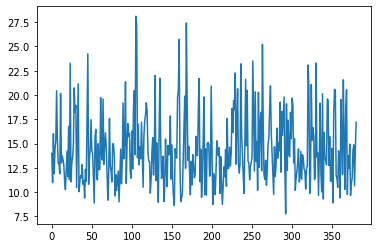

In [14]:
plt.plot(X_train[:,0])

In [15]:
from sklearn.preprocessing import StandardScaler

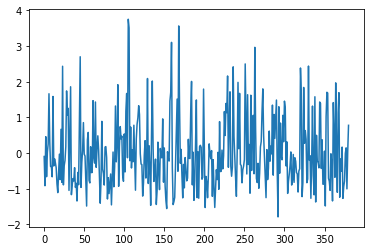

In [16]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
plt.plot(X_train[:,0]) 
# plt.plot(X_test[0,:])

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100)

print("Train score:",model.evaluate(X_train,y_train))
print("Test score:",model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 55ms/step - loss: 1.0055 - accuracy: 0.3384 - val_loss: 0.9784 - val_accuracy: 0.3457
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9081 - accuracy: 0.4291 - val_loss: 0.8935 - val_accuracy: 0.3936
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8062 - accuracy: 0.4751 - val_loss: 0.8161 - val_accuracy: 0.4415
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.5737 - val_loss: 0.7471 - val_accuracy: 0.5053
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6340 - val_loss: 0.6871 - val_accuracy: 0.5532
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.6910 - val_loss: 0.6345 - val_accuracy: 0.6223
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.6969 - val_loss: 0.5879 - val_accuracy: 0.6915
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.9689 - val_loss: 0.1518 - val_accuracy: 0.9734
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9707 - val_loss: 0.1504 - val_accuracy: 0.9734
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9690 - val_loss: 0.1490 - val_accuracy: 0.9734
Epoch 62/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1264 - accuracy: 0.9772 - val_loss: 0.1477 - val_accuracy: 0.9734
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9736 - val_loss: 0.1465 - val_accuracy: 0.9734
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9728 - val_loss: 0.1452 - val_accuracy: 0.9787
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.9761 - val_loss: 0.1440 - val_accuracy: 0.9787
Epoch 

In [ ]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")

In [ ]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")

In [40]:
x = scaler.transform(data.data)
predicho = model.predict(x)

# predicho = np.round(predicho)

In [25]:
X_test.shape

(188, 30)

Text(0.5, 1.0, 'Sin redondear')

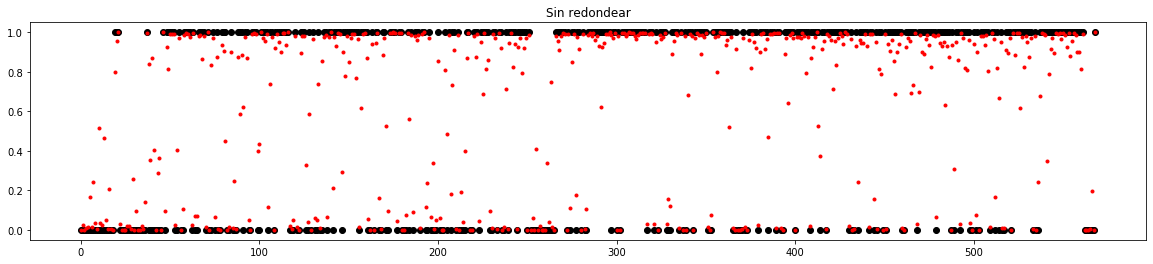

In [44]:
fig, ax = plt.subplots(figsize=(20,4))

ax.plot(data.target,'ko')
ax.plot(predicho,'r.')
ax.set_title("Sin redondear")

In [45]:
x = scaler.transform(data.data)
predicho = model.predict(x)

predicho = np.round(predicho)

Text(0.5, 1.0, 'Redondear')

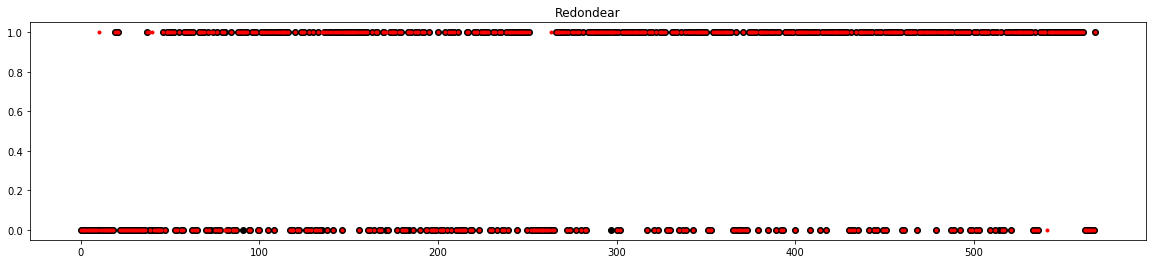

In [46]:
fig, ax = plt.subplots(figsize=(20,4))

ax.plot(data.target,'ko')
ax.plot(predicho,'r.')
ax.set_title("Redondear")